In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# sigularities
def sing(x,a,n):
    if not isinstance(x, np.ndarray):
        x = np.array([x])
    ni = np.zeros(x.size)
    for i in range(x.size):
        if x[i] >=a and n>=0:
            ni[i] = (x[i]-a)**n
    return ni/np.math.factorial(n)

def lx(ord_f,pc, tire_l, case):
    p1,p2 = pp(tire_l,case)
    if case == 1:
        return m*((1-pc)*sing(dx,0,ord_f)-p1*sing(dx,a2,ord_f)-0.5*sing(dx,tire_l,ord_f)-p2*sing(dx,lc,ord_f)+pc/2*(sing(dx,lw1,ord_f)+sing(dx,lw2,ord_f))
    else:
        return m*((1-pc)*sing(dx,0,ord_f)-p1*sing(dx,a2,ord_f)-p2*sing(dx,lc,ord_f)+pc/2*(sing(dx,lw1,ord_f)+sing(dx,lw2,ord_f)))

def pp(l,cases=1):
    if cases == 1:
        j = 72
        k = 0.5
    else:
        k = 1
        j = 96
    e1 = k*(l-j)/(lc-120)
    return k-e1,e1

def trail(a,pc,l2, case=2):
    p1,p2 = pp(l2,case)
    me = m
    if case == 1:
        return m*(p1*sing(dx,a2,ord_f)+p2*sing(dx,lc,ord_f)-0.5*sing(dx,l2+wb,ord_f))
    else:
        if case == 3:
            me = mb
        return me*(p1*sing(dx,a2,ord_f)+p2*sing(dx,lc,ord_f)-0.5*(sing(dx,l2+wb,ord_f)+sing(dx,l2,ord_f)))

note case on full front, case on half front,

case on back



In [3]:
len_full = 300

# predefined arrays
dx = np.linspace(-1,len_full, 200)
rear_react_per = np.arange(60,len_full-50,10)


In [4]:

def run_f():
    max_p = [[0,0]]
    react_mat = []

    max_ptip = [[0,0]]
    react_mattip = []
    # loop through locations

    for per_load in rear_react_per:
        p = (per_load+24)*2/(lw1+lw2)
        if per_load < st:
            case = 1
        elif per_load <len_full-50:
            case = 2
        else:
            case = 3

        # initialize constants for each


        #singularity

        load = lx(0,p,per_load,case)
        mom = lx(1,p,per_load,case)

        tip_l = trail(0,p,per_load,case)
        tip_m = trail(1,p, per_load,case)
        #, v: {}, m:{}')
        sig = mom/(2*S)  # stress
        sigtip = tip_m/(2*s2)

        react_mat.append([load, mom, sig])
        max_sig = np.max(np.abs(sig))

        max_p.append([p*1, max_sig*1])  # max stress for this loading condition and this location

        react_mattip.append([tip_l, tip_m, sigtip])
        max_sigtip = np.max(np.abs(sigtip))

        max_ptip.append([p*1, max_sigtip*1])  # max stress for this loading condition and this location

    # tabulation of this location, and max of location
    max_p = np.array(max_p)
    m_n = np.argmax(max_p,0)
    m_a = max_p[m_n[1],:]

    # adding to list of all locs

    # tabulation of this location, and max of location
    max_ptip = np.array(max_ptip)
    m_ntip = np.argmax(max_ptip,0)
    m_atip = max_ptip[m_ntip[1],:]


    # max for each percent, len
    for i in range(max_p.shape[0]-1):
        fis = max_p[i+1,1]
        fs2 = '||||||||||' if fis>= yield_s else ''
        print(f'Dis load loc {round(rear_react_per[i],1)}(in) at rear load: {int(max_p[i+1,0]*100)}% = Max \u03C3: {round(fis,2)}(psi)::: {round(fis/1000,1)}(ksi){fs2}')


    print(f'\n--------------------\noverall max at len(in): {round(rear_react_per[m_n[1]-1], 2)}, rear load: {int(m_a[0]*100)}%,  \u03C3 = {round(m_a[1], 2)}(psi)')
    # max for each percent, len
    print(f'\n\n--------------------\ntrailer\n--------------------\n')
    
    for i in range(max_ptip.shape[0]-1):
        fis = max_ptip[i+1,1]
        fs2 = '||||||||||' if fis>= yield_s else ''
        print(f'Dis load loc {round(rear_react_per[i],1)}(in) at rear load: {int(max_ptip[i+1,0]*100)}% = Max \u03C3: {round(fis,2)}(psi)::: {round(fis/1000,1)}(ksi){fs2}')


    print(f'\n--------------------\noverall max at len(in): {round(rear_react_per[m_ntip[1]-1], 2)}, rear load: {int(m_atip[0]*100)}%,  \u03C3 = {round(m_atip[1], 2)}(psi)')
    return react_mat,react_mattip,max_p

def plot_x(react_mat,react_mattip,max_p):
    # SFD BMD, \u03C3 vs distance for each condition of len,percent
    lft = [react_mat,react_mattip]
    plt_n = ['main', 'tip']
    for ii in range(len(react_mat)):
        fig, ax = plt.subplots(1,2)
        for i in range(2):
            ax[i].grid(True)
            m_half = lft[i][ii]

            ax[i].plot(dx,m_half[0])
            ax[i].plot(dx,m_half[1]*1e-2)
            ax[i].plot(dx,m_half[2]*1e-1)

            ax[i].legend(['Shear (lb)', 'Moment(100*lb*in)', 'Sigma (10*psi)'])
            ax[i].settipitle(f'SFD BMD, \u03C3 allong trailer(in) for current loading on {plt_n[i]}')
        fig.suptitle(f'Plots for len of load: {round(rear_react_per[ii],2)}(in) rear Load:{int(max_p[ii,0]*100)}%')


Dis load loc 60(in) at rear load: 42% = Max σ: 55372.5(psi)::: 55.4(ksi)||||||||||
Dis load loc 70(in) at rear load: 47% = Max σ: 53816.27(psi)::: 53.8(ksi)||||||||||
Dis load loc 80(in) at rear load: 52% = Max σ: 53828.96(psi)::: 53.8(ksi)||||||||||
Dis load loc 90(in) at rear load: 57% = Max σ: 53931.05(psi)::: 53.9(ksi)||||||||||
Dis load loc 100(in) at rear load: 62% = Max σ: 52779.47(psi)::: 52.8(ksi)||||||||||
Dis load loc 110(in) at rear load: 68% = Max σ: 54720.99(psi)::: 54.7(ksi)||||||||||
Dis load loc 120(in) at rear load: 73% = Max σ: 46035.08(psi)::: 46.0(ksi)
Dis load loc 130(in) at rear load: 78% = Max σ: 37349.16(psi)::: 37.3(ksi)
Dis load loc 140(in) at rear load: 83% = Max σ: 28663.25(psi)::: 28.7(ksi)
Dis load loc 150(in) at rear load: 88% = Max σ: 19977.33(psi)::: 20.0(ksi)
Dis load loc 160(in) at rear load: 93% = Max σ: 11291.42(psi)::: 11.3(ksi)
Dis load loc 170(in) at rear load: 98% = Max σ: 10412.35(psi)::: 10.4(ksi)
Dis load loc 180(in) at rear load: 103% = Max

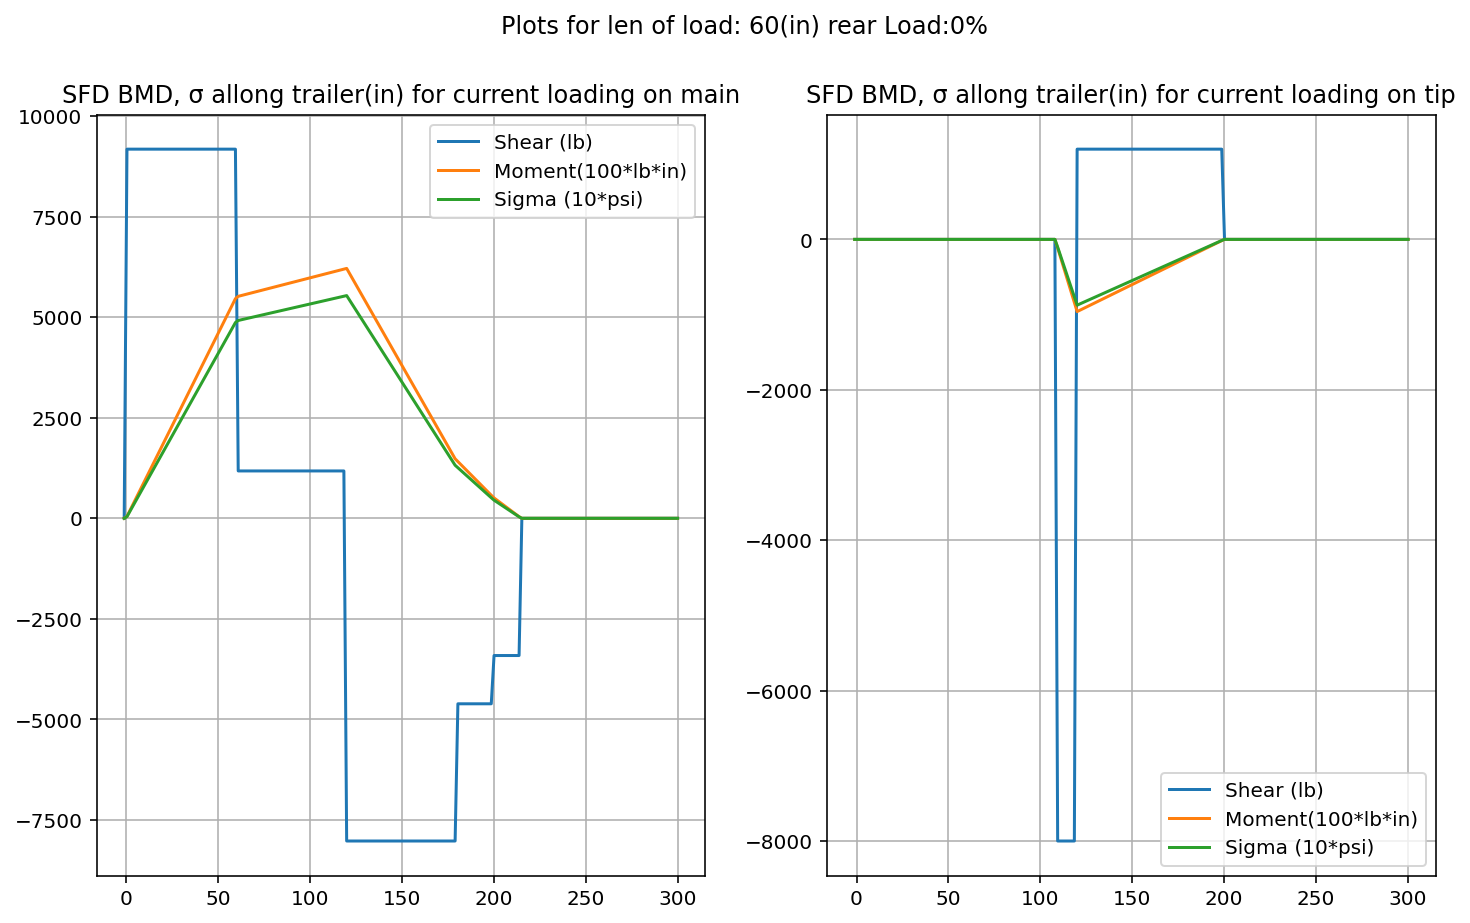

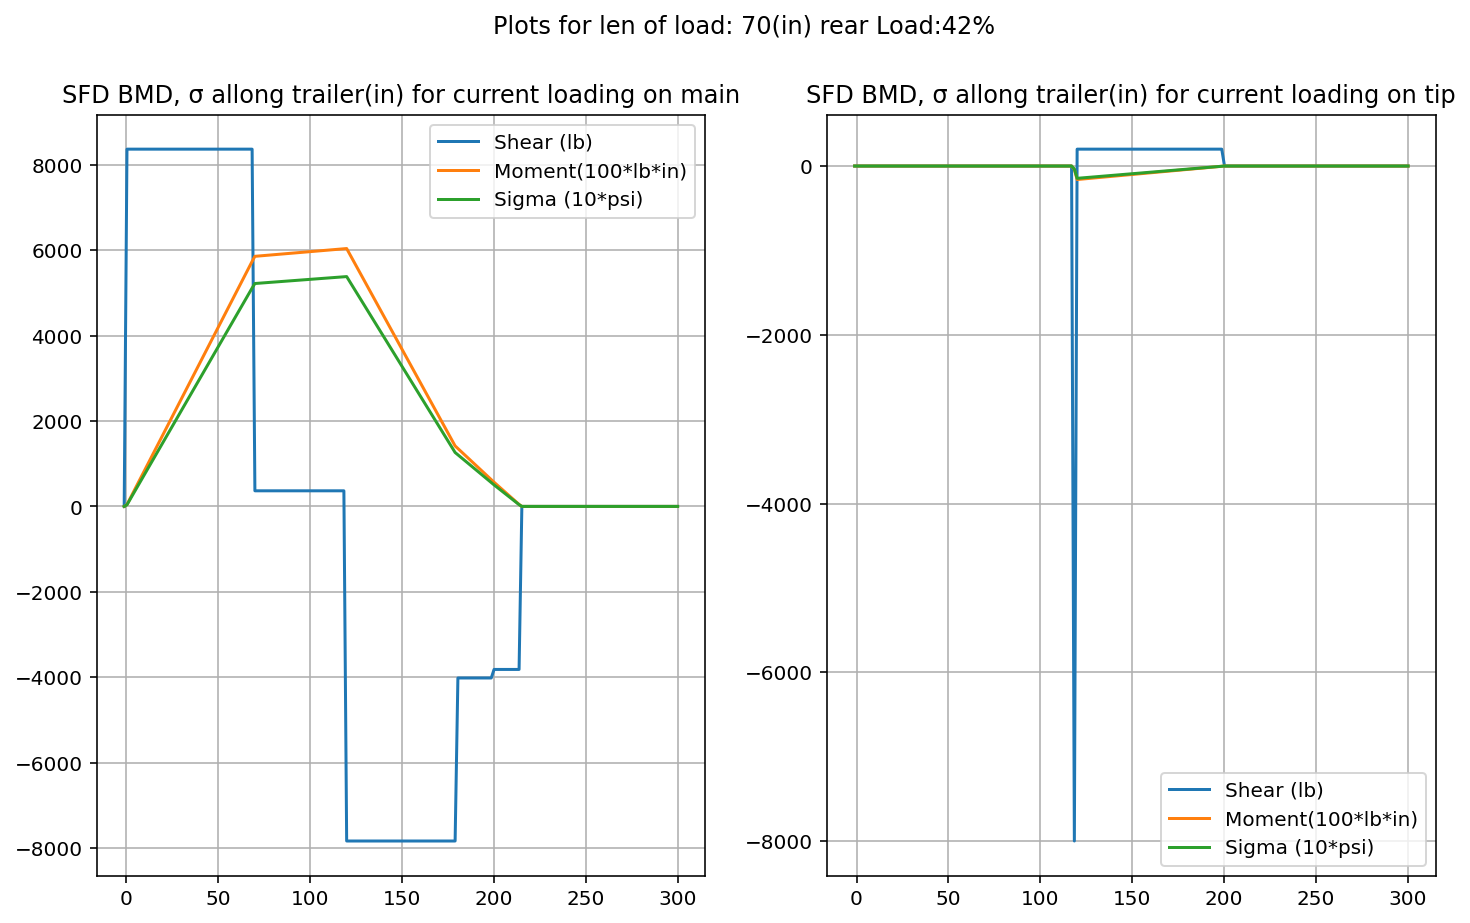

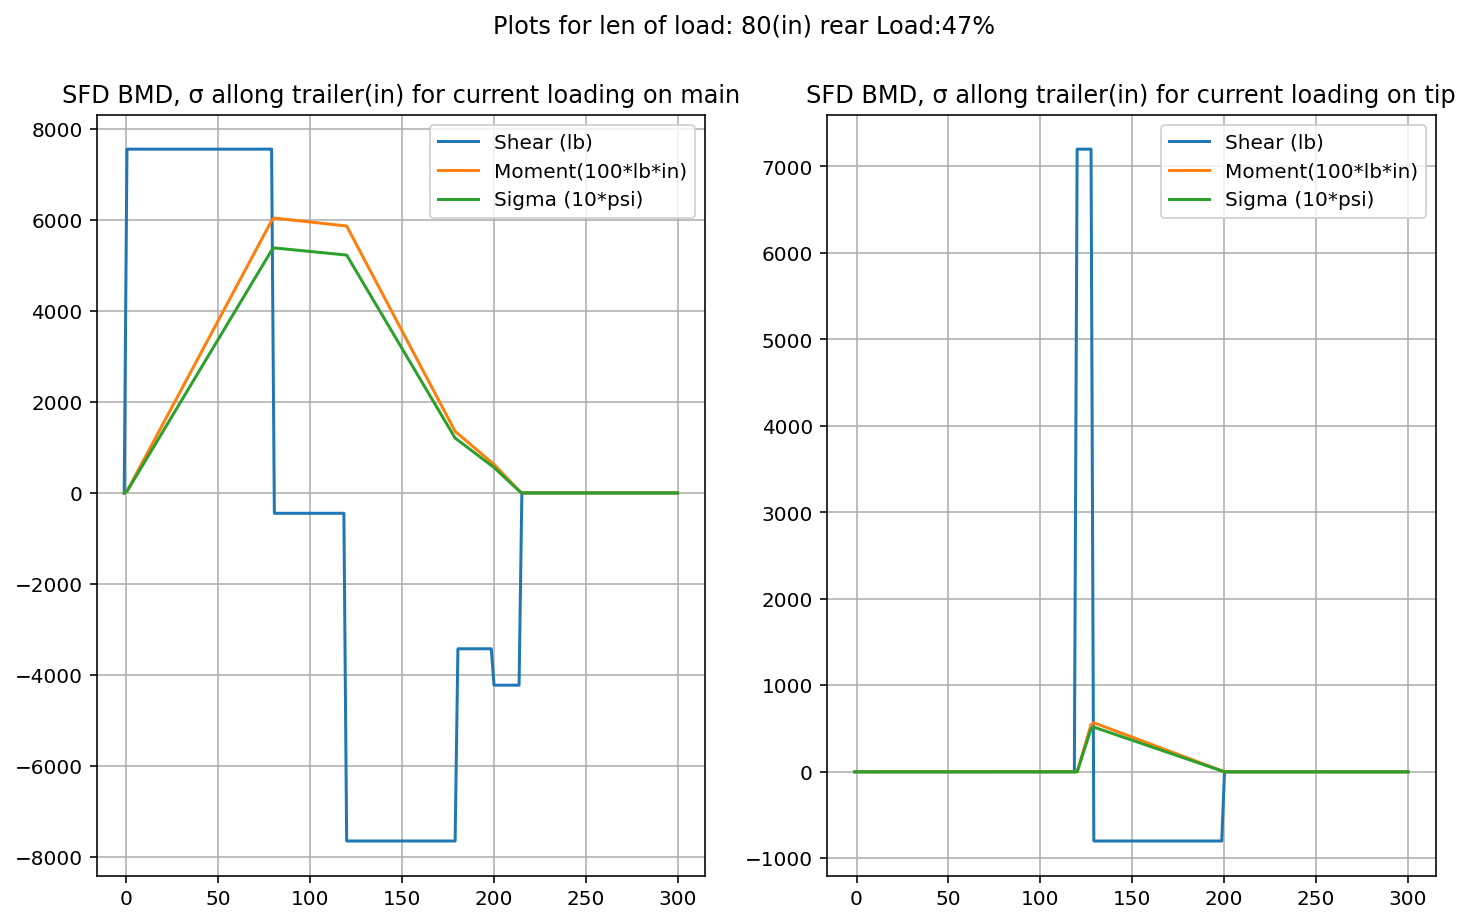

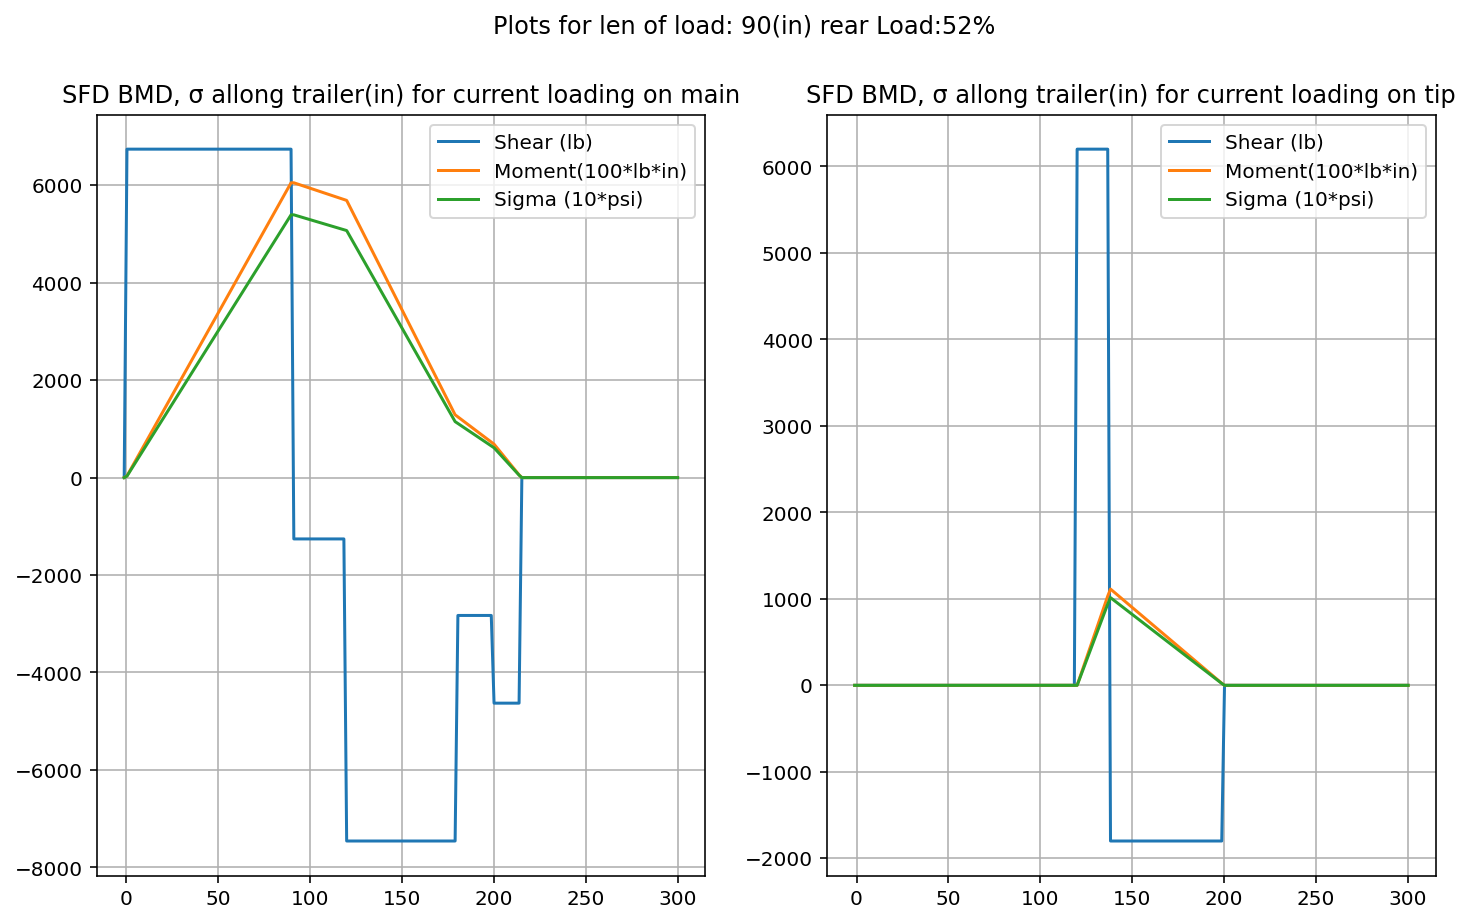

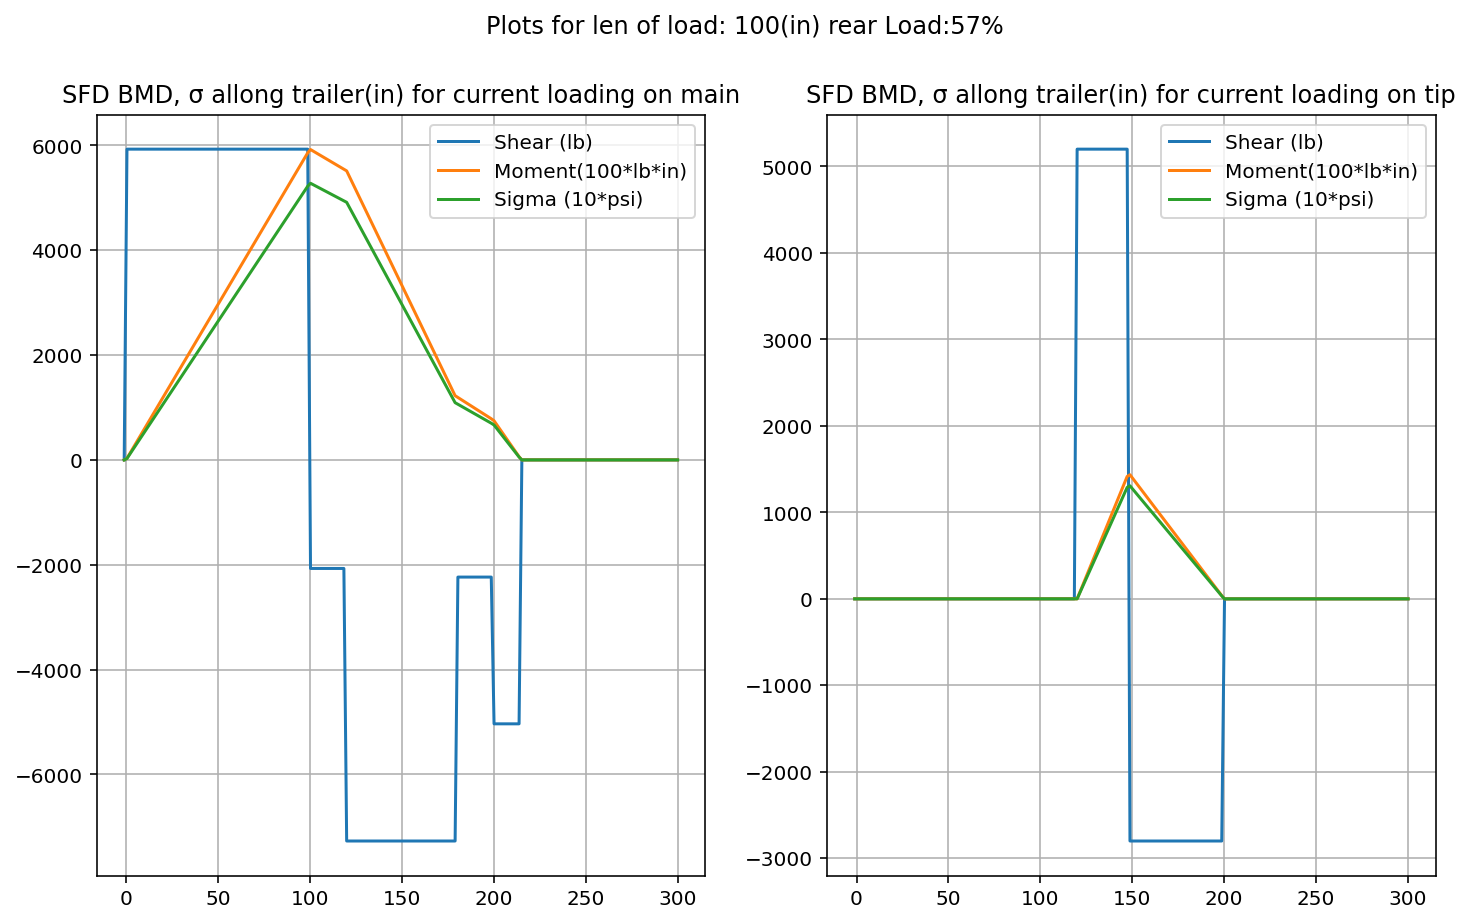

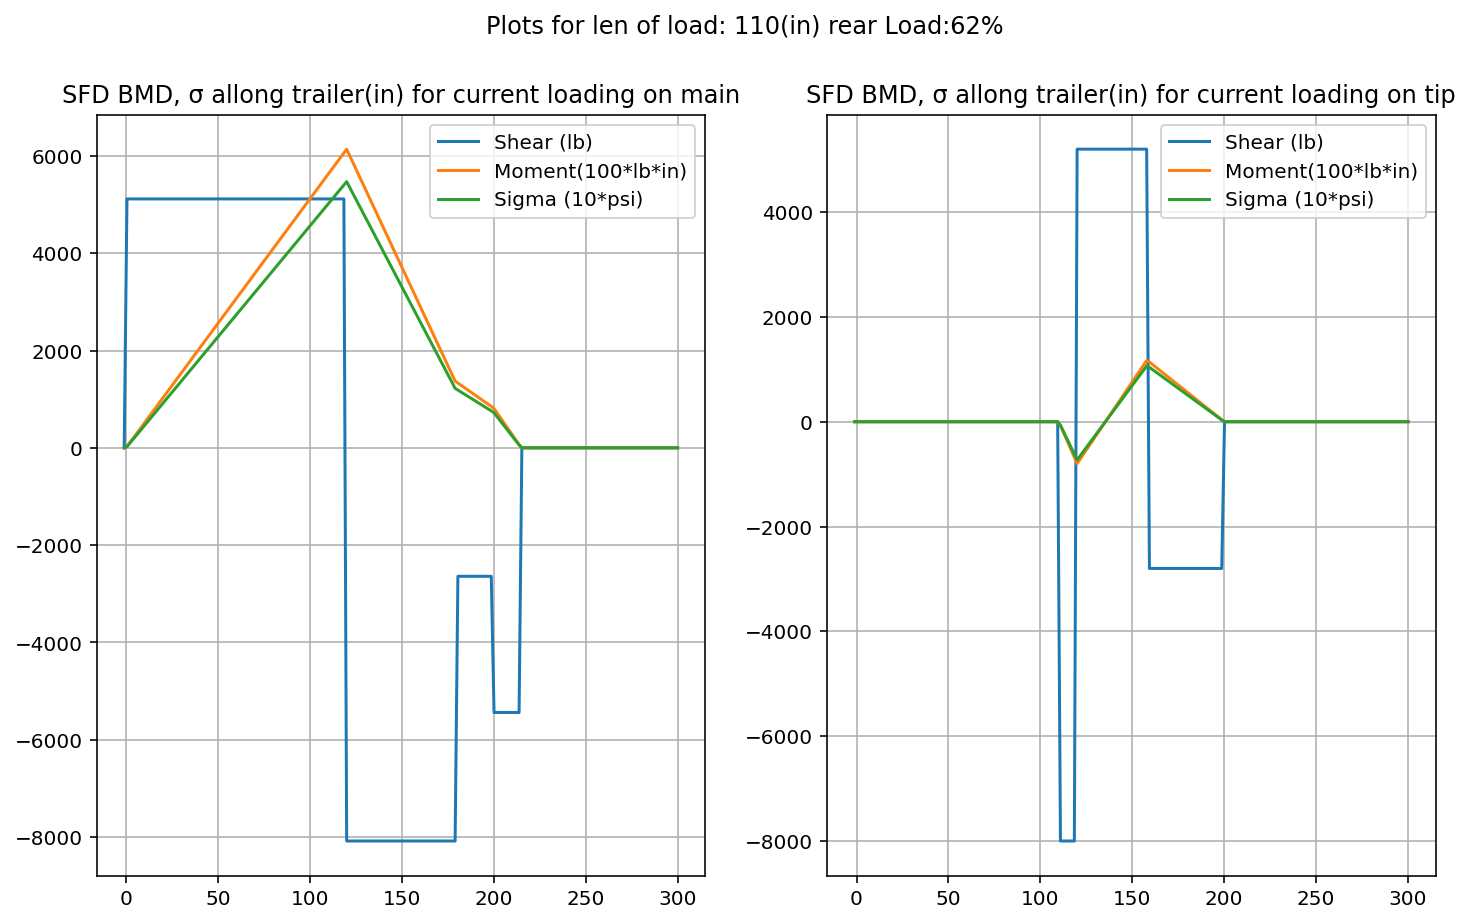

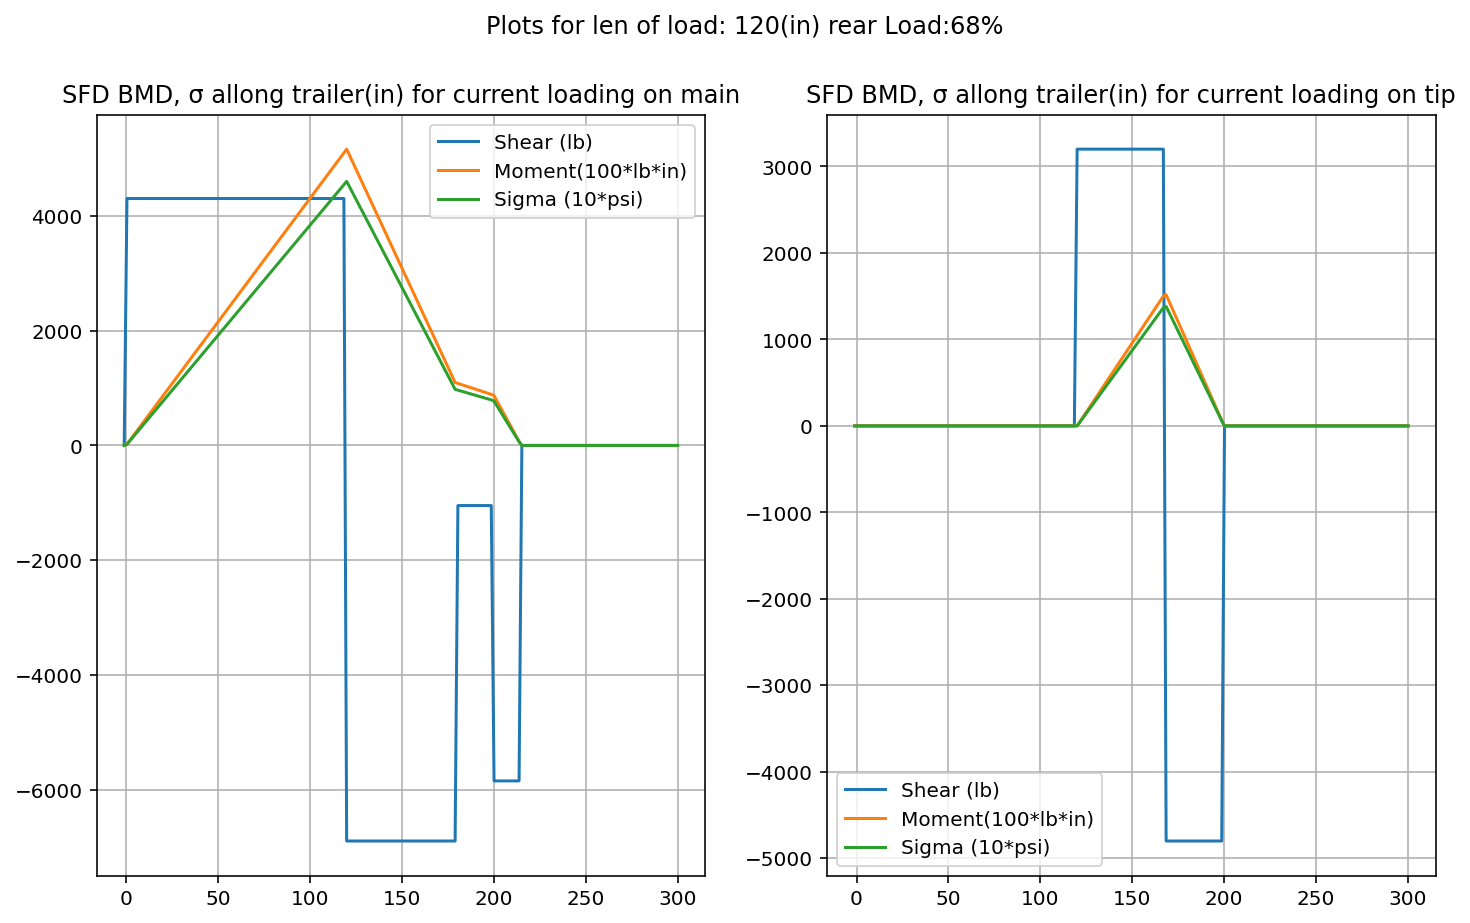

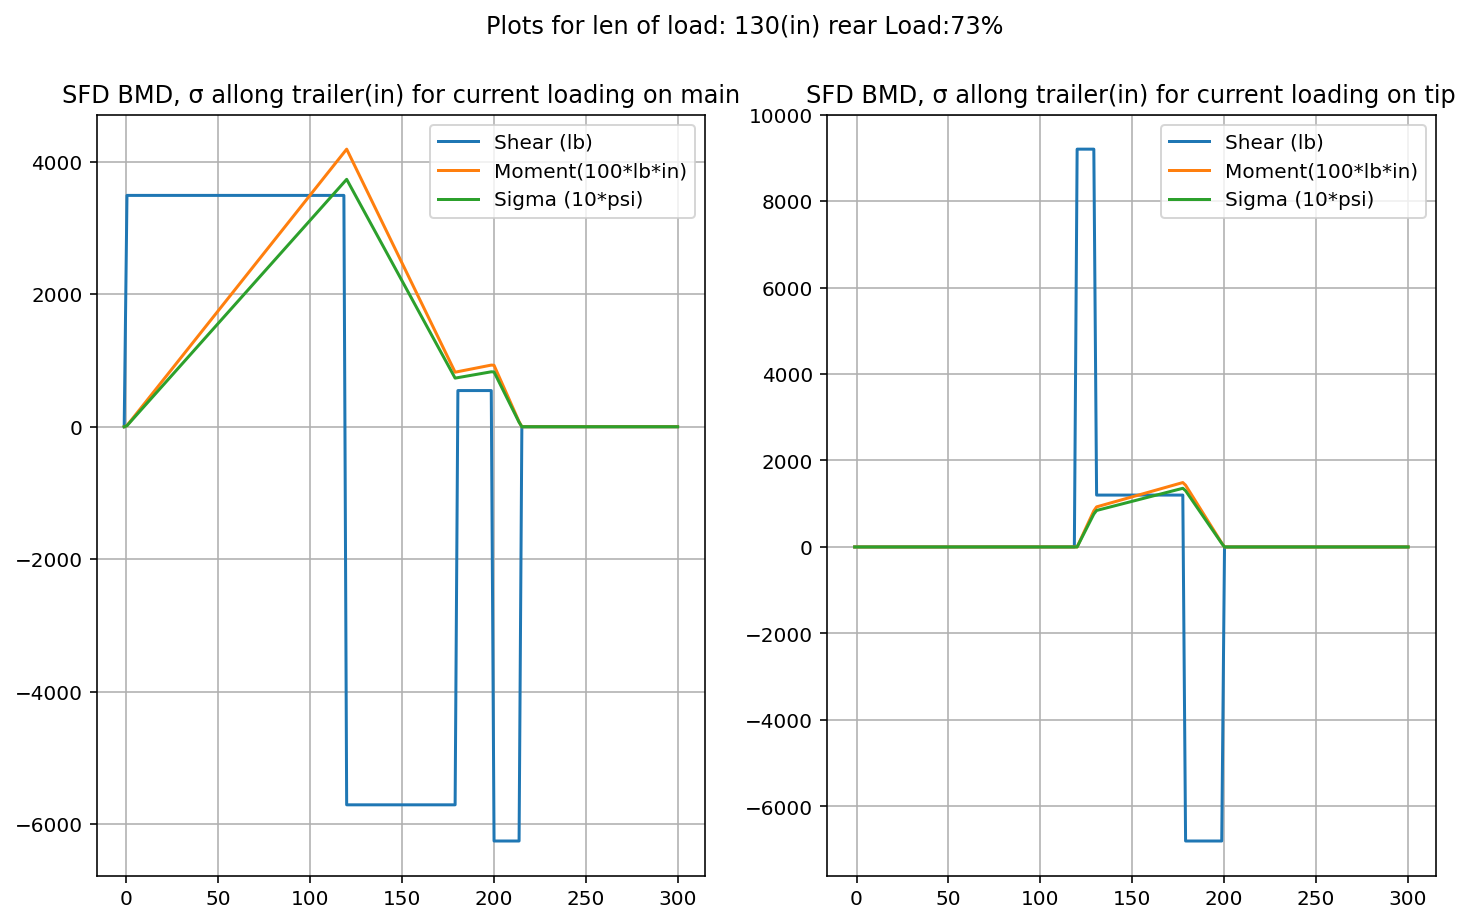

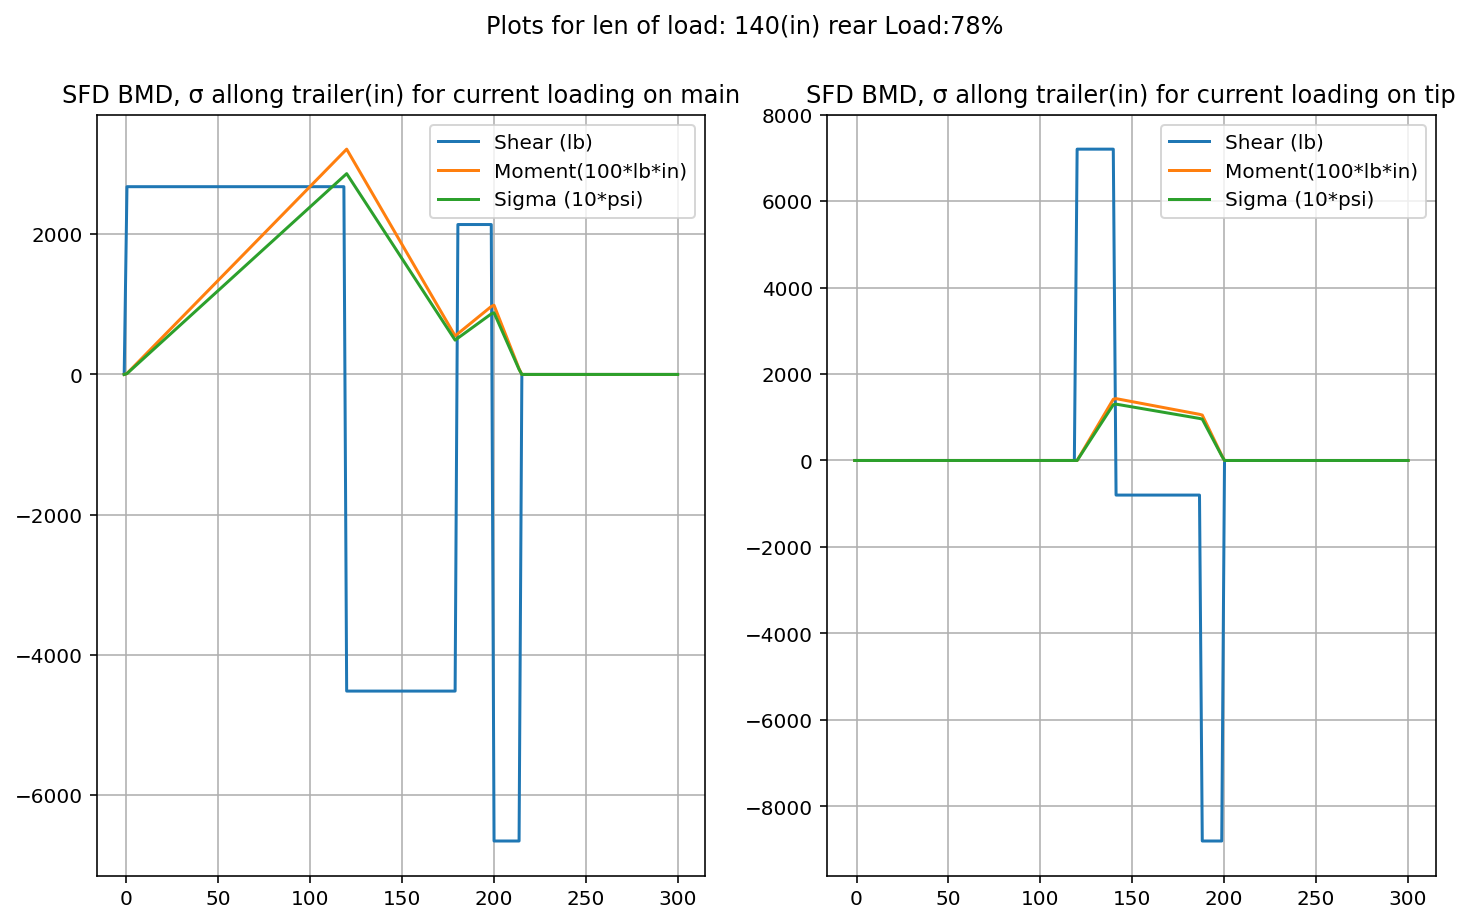

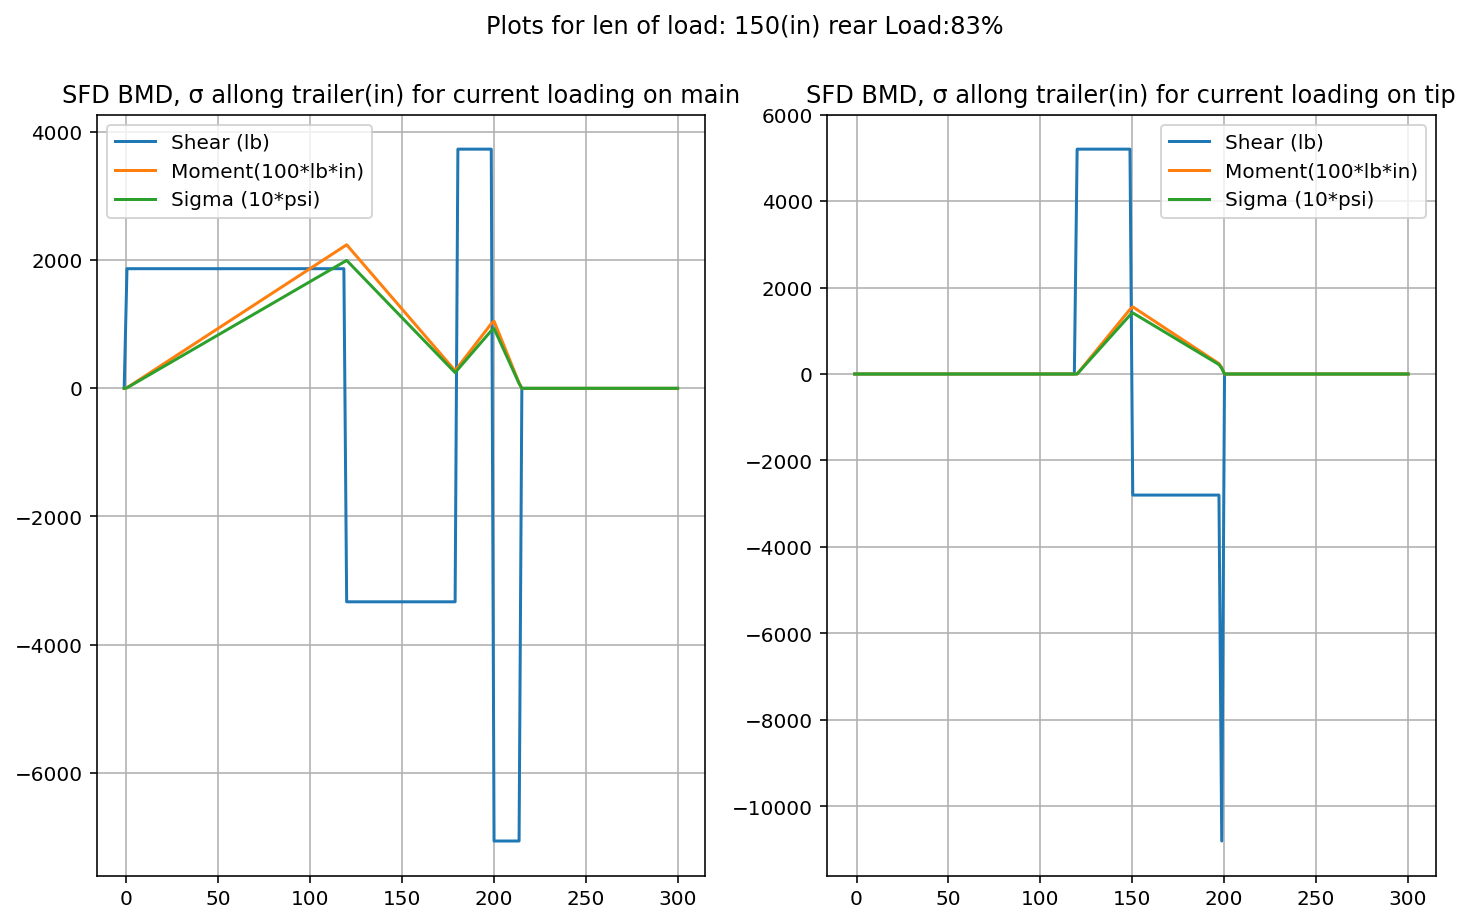

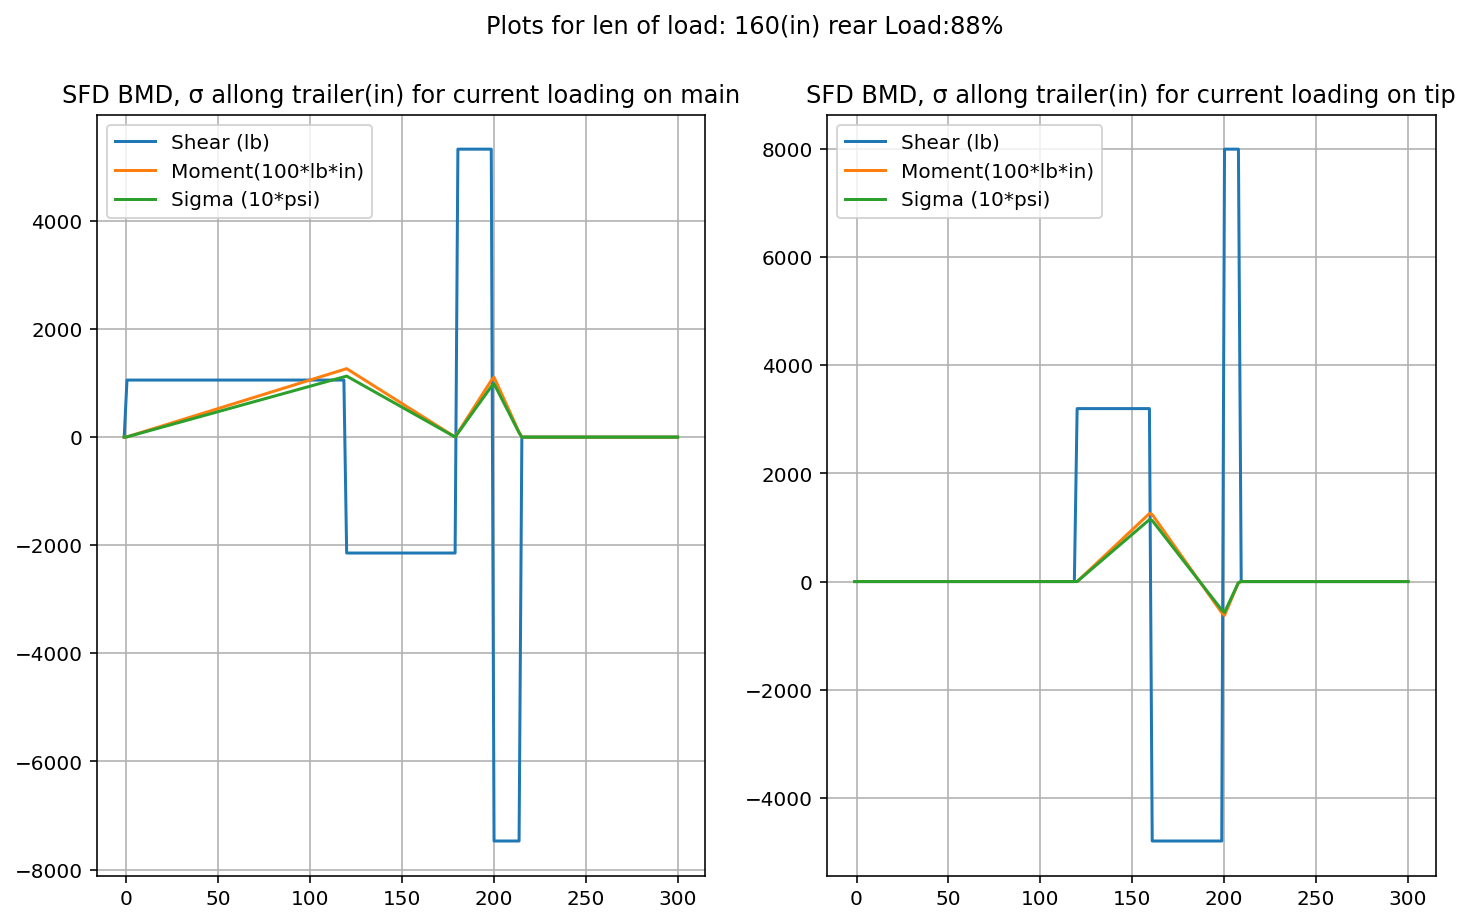

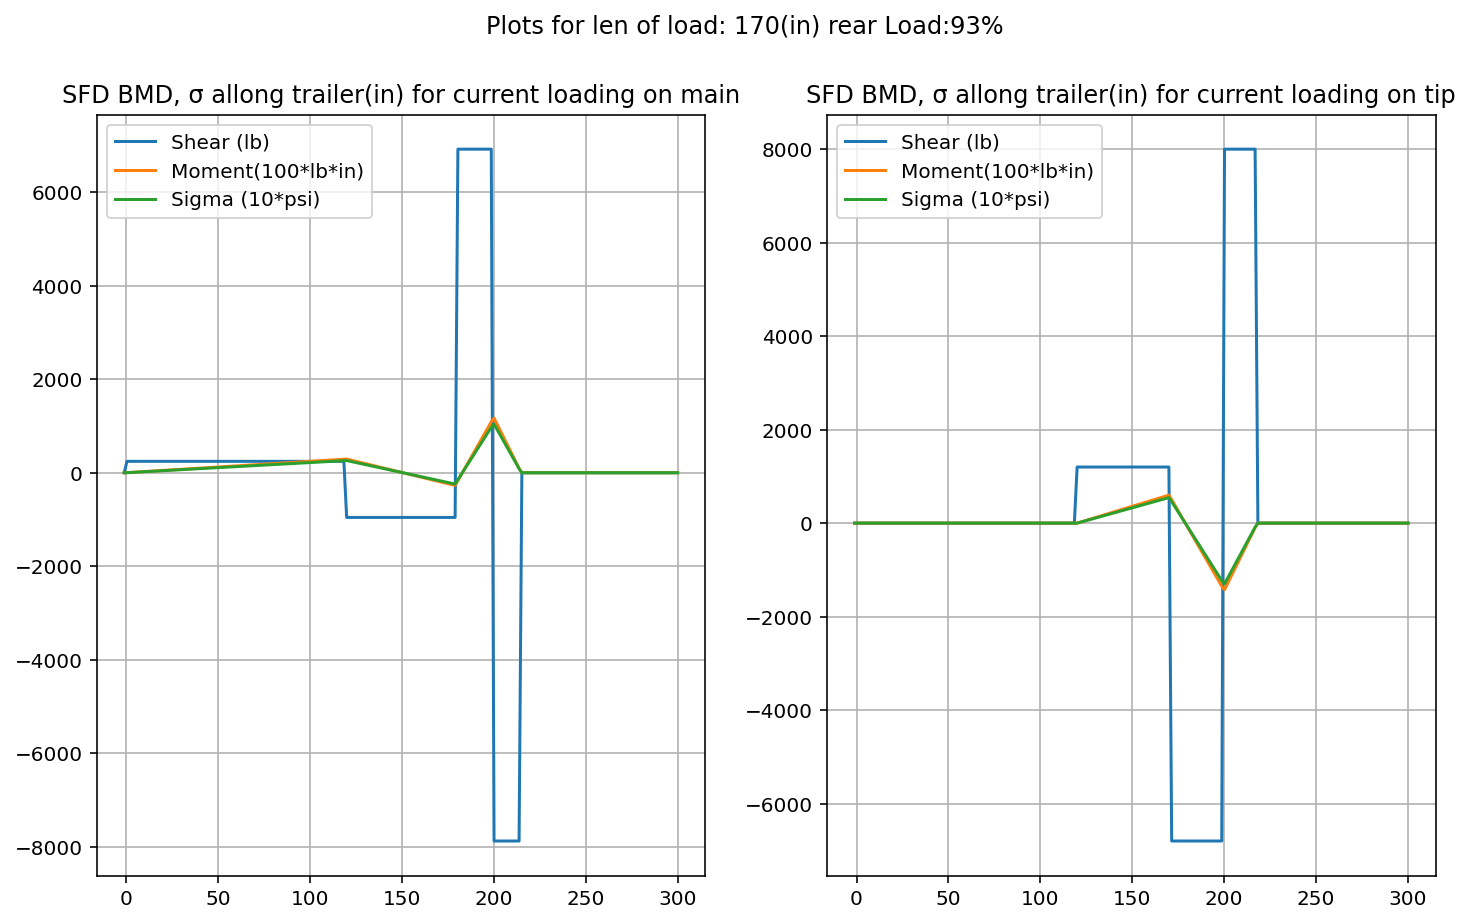

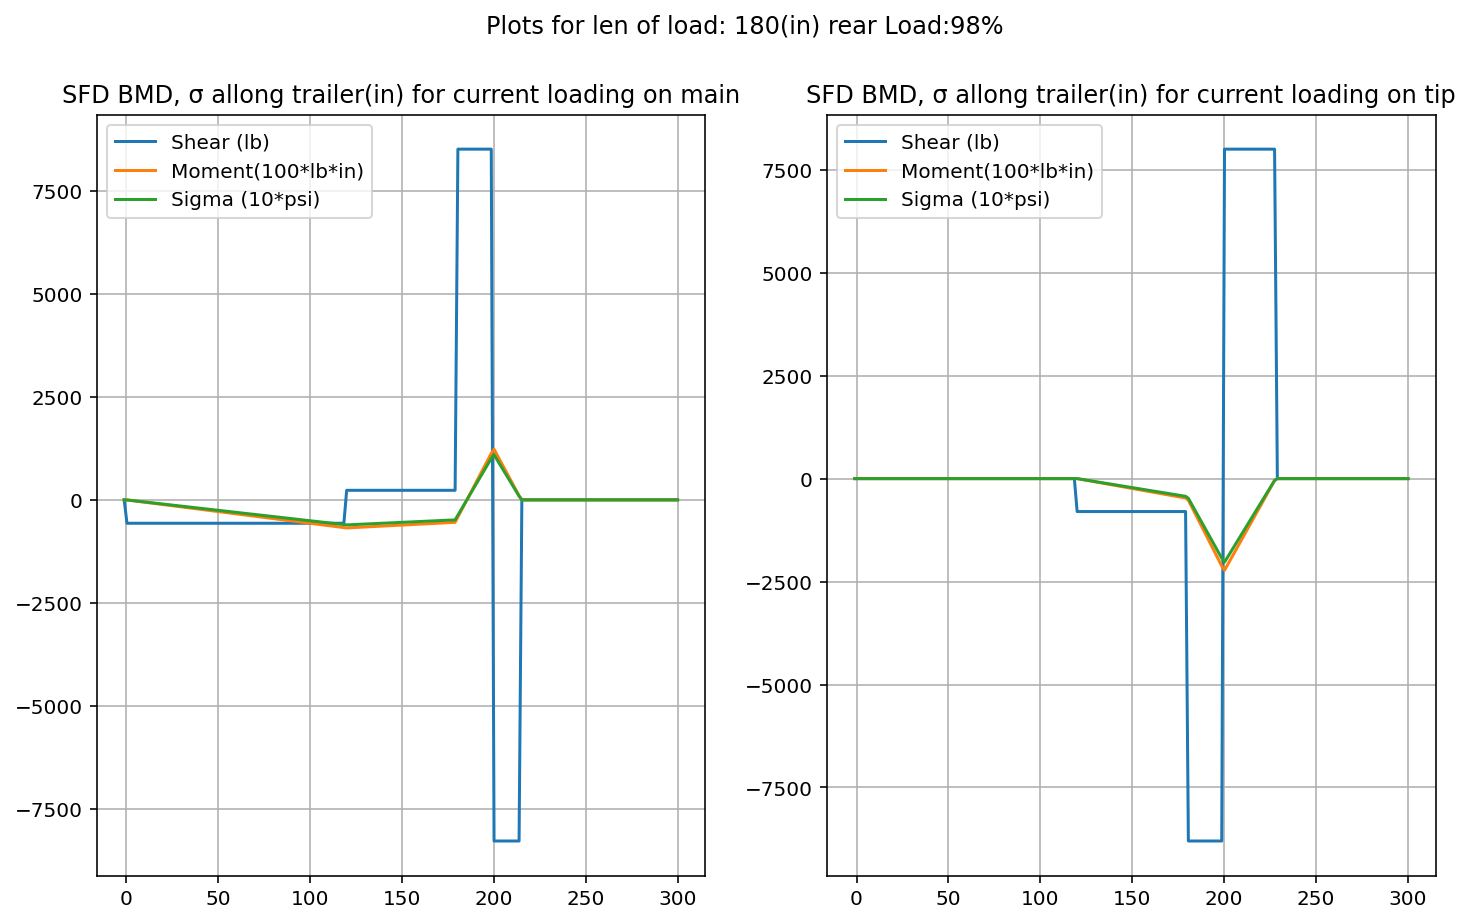

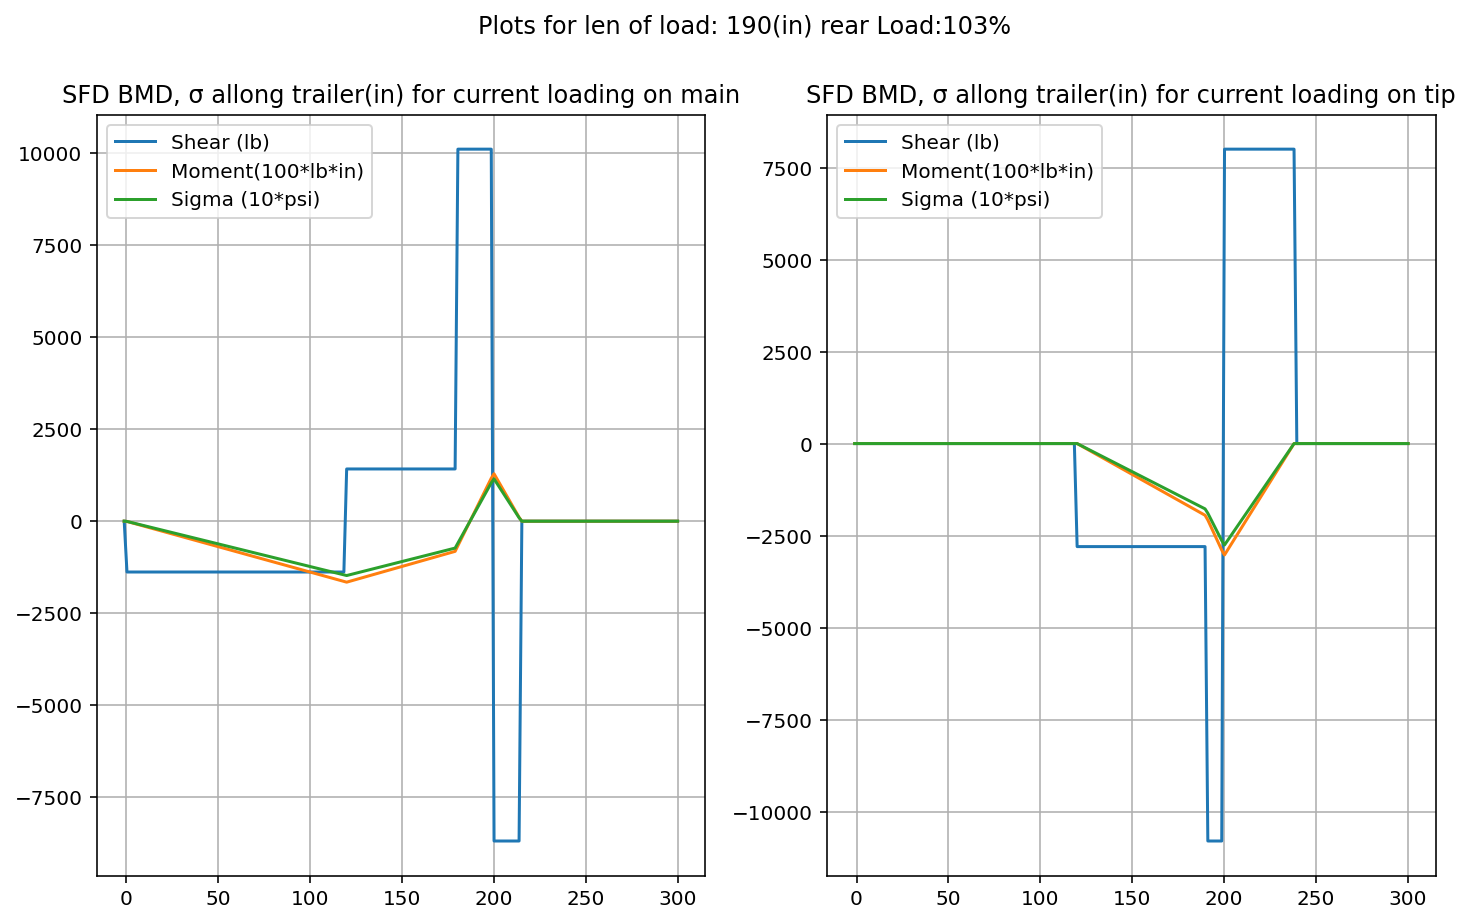

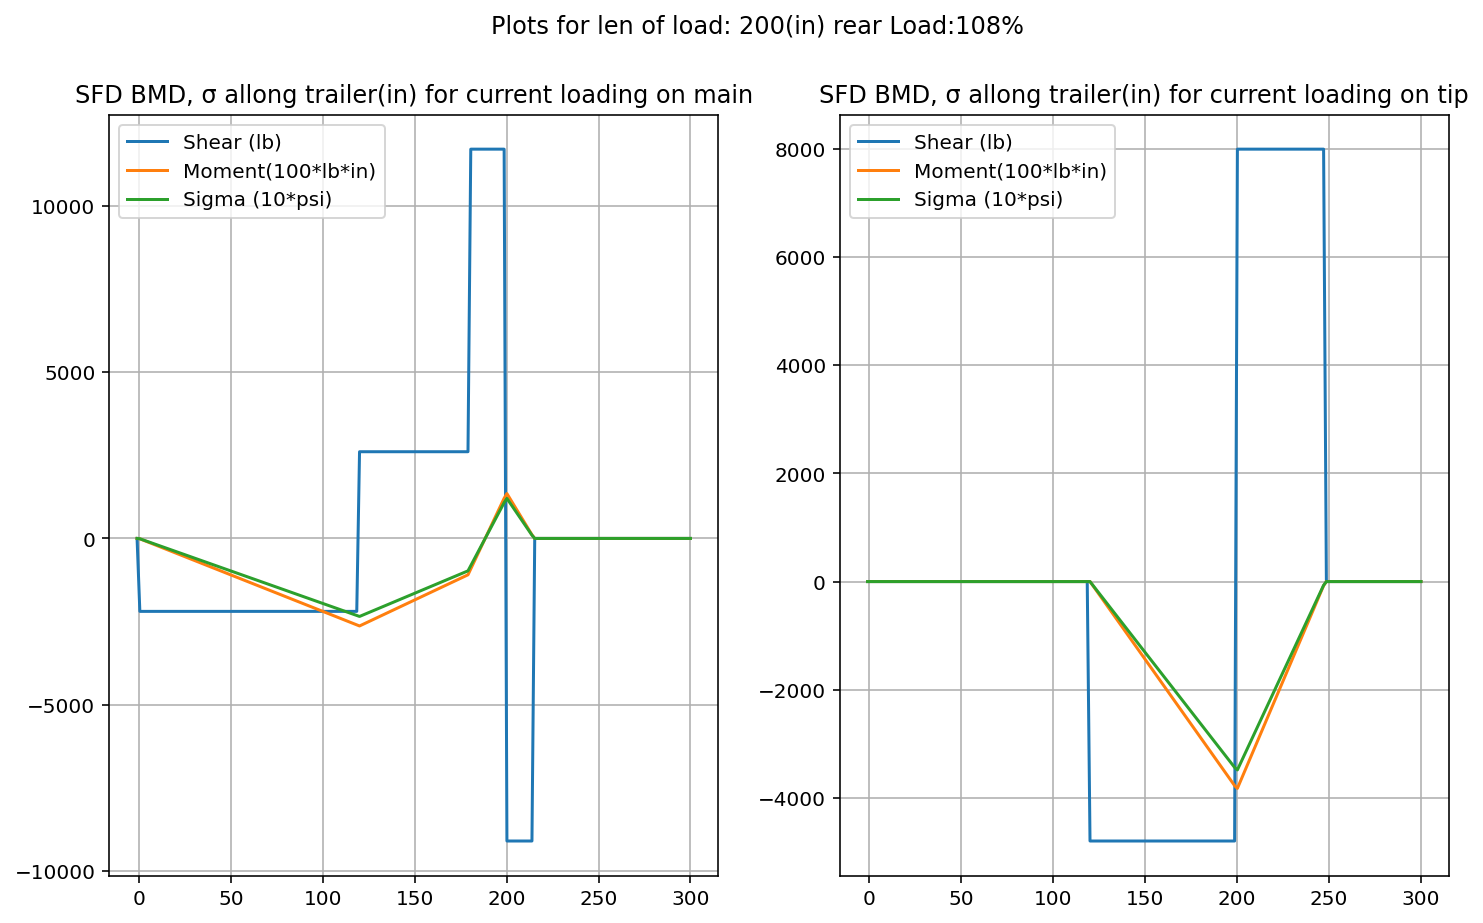

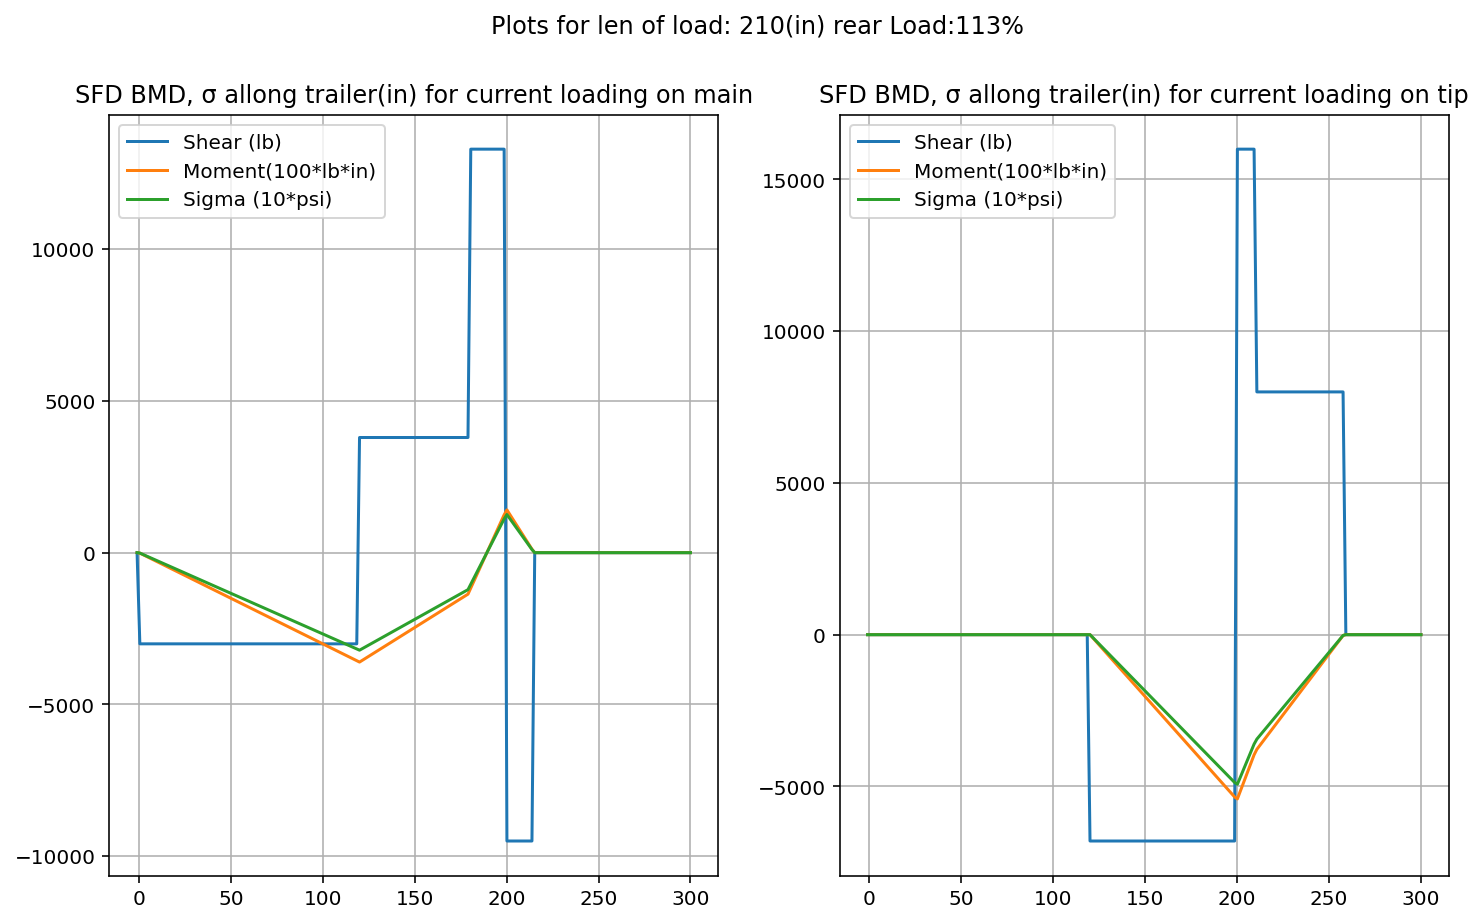

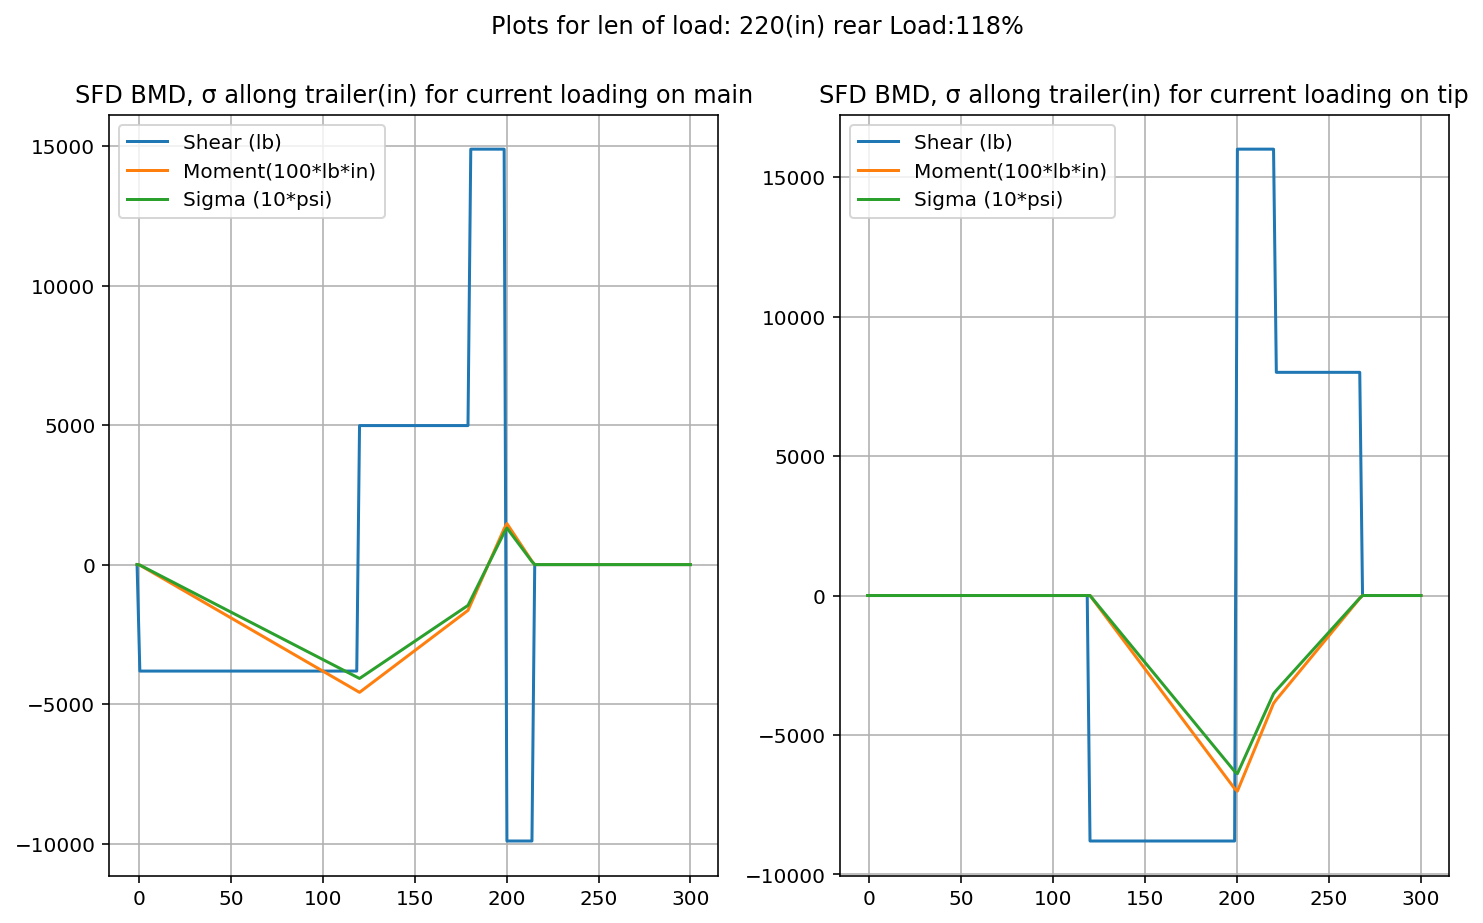

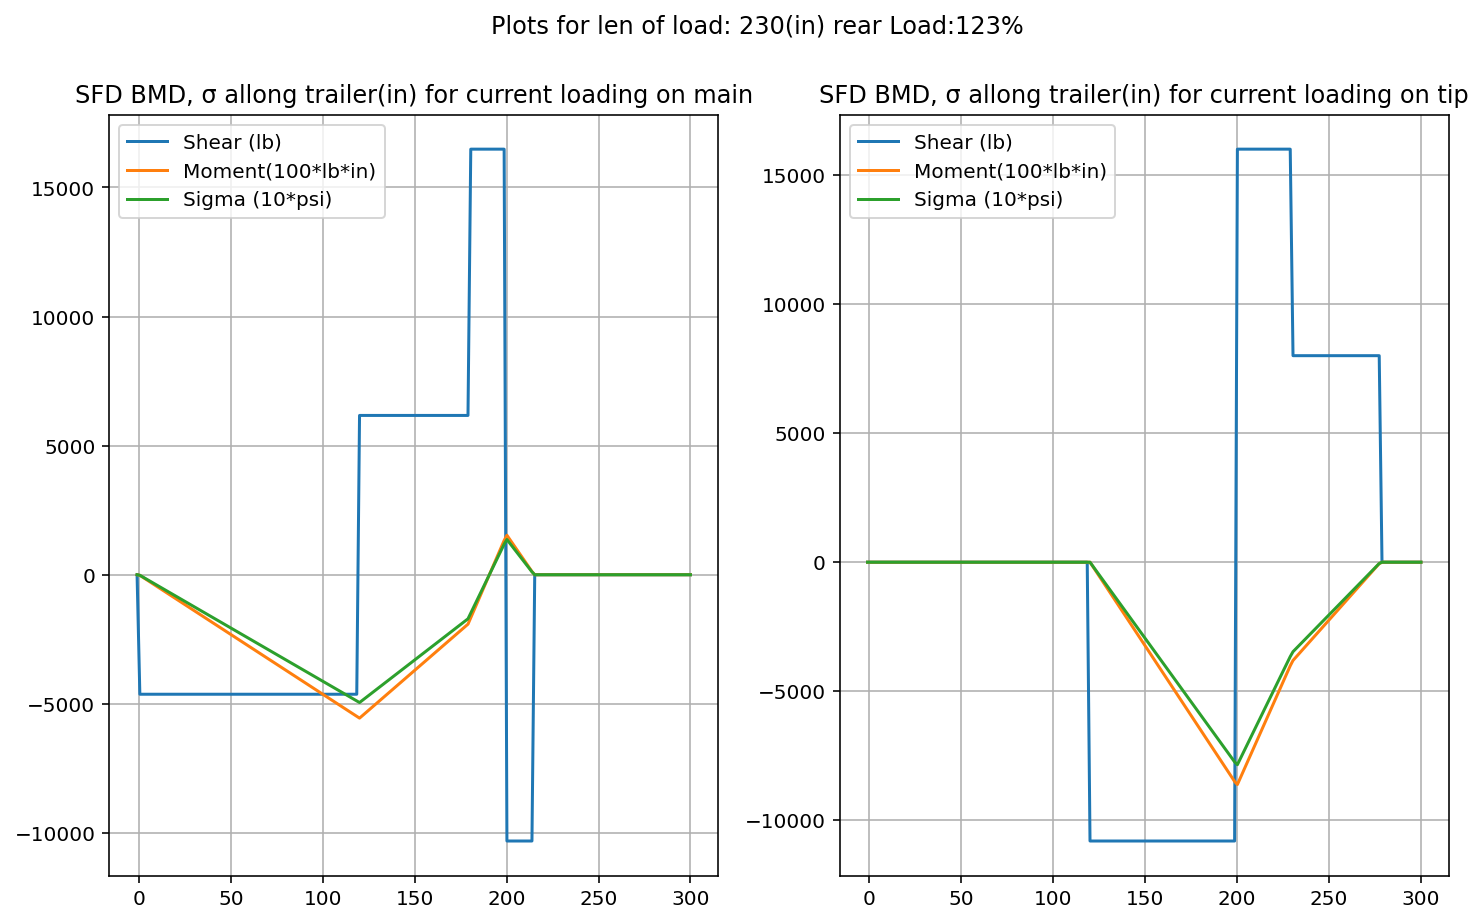

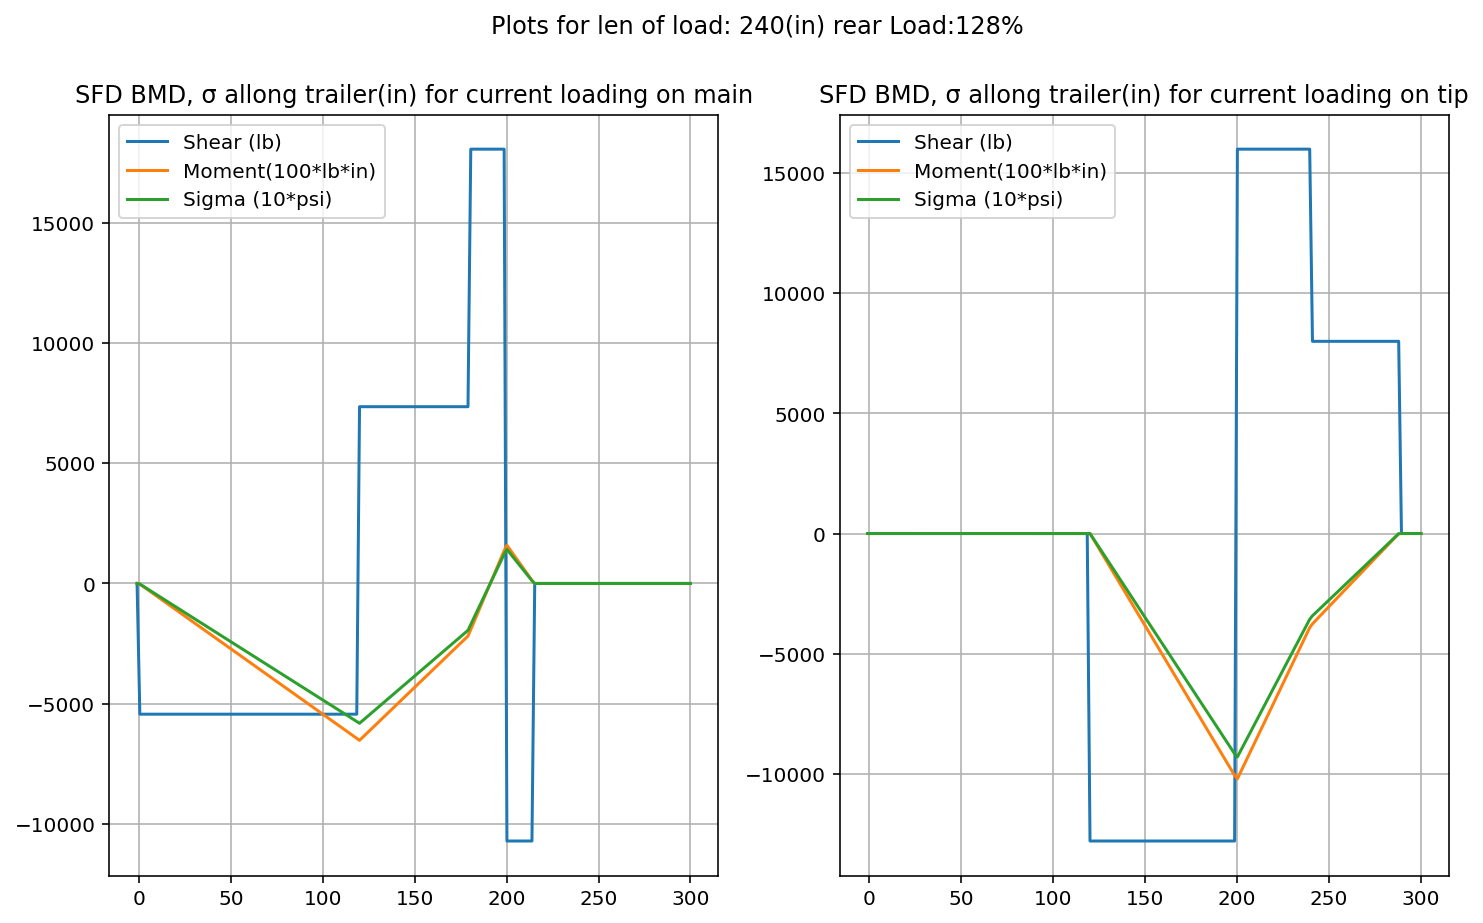

In [5]:
#test 1
#constants
yield_s = 50000
l1 = 200
l0 =120
lw1 = 179
lw2 = 215
m = 16000
S = 5.61
s2=5.49

st = 104
wb = 48
mb=10000

react_mat1,react_mattip1,mp = run_f()
plot_x(react_mat1,react_mattip1,mp)
